# Feature Selection for classification

In [37]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate Dataset
X, y = make_classification(n_samples=50, n_features=5, n_informative=2)
X = pd.DataFrame(X)

n_informative means there should be 2 classes

In [38]:
X.head()

,0,1,2,3,4
0,-0.940862,-1.121306,-0.818472,-0.258697,0.366091
1,-0.000372,0.743686,1.292004,-0.142524,-0.816568
2,-1.564537,-0.137180,-1.283306,-0.438746,0.559652
3,0.055604,0.615234,-1.721370,0.210324,1.096788
4,2.016537,1.939072,-3.593550,1.143817,2.594995


Y implies the labels of the dataset ==> Supervised Learning

In [39]:
y[:5]

array([0, 1, 0, 0, 0])

In [40]:
# Select top K features
from sklearn.feature_selection import SelectKBest

# To get mutual score in classification dataset
from sklearn.feature_selection import mutual_info_classif

In [41]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)

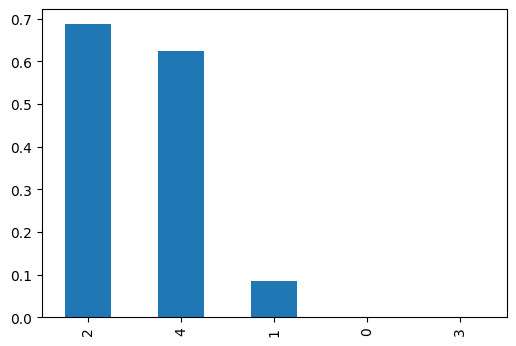

In [42]:
fs.fit(X,y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))
plt.show()

In [43]:
selected_X = fs.fit_transform(X,y)
selected_X = pd.DataFrame(selected_X)

In [47]:
X.head()

,0,1,2,3,4
0,-0.940862,-1.121306,-0.818472,-0.258697,0.366091
1,-0.000372,0.743686,1.292004,-0.142524,-0.816568
2,-1.564537,-0.137180,-1.283306,-0.438746,0.559652
3,0.055604,0.615234,-1.721370,0.210324,1.096788
4,2.016537,1.939072,-3.593550,1.143817,2.594995


In [46]:
selected_X.head()

,0,1,2
0,-1.121306,-0.818472,0.366091
1,0.743686,1.292004,-0.816568
2,-0.137180,-1.283306,0.559652
3,0.615234,-1.721370,1.096788
4,1.939072,-3.593550,2.594995


## Feature Selection for Regression Problem using Mutual Information

In [48]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
import pandas as pd
import matplotlib.pyplot as plt

# generate dataset
X, y = make_regression(n_samples=50, n_features=5)
X = pd.DataFrame(X)

In [49]:
X.head(5)

,0,1,2,3,4
0,-1.374776,0.403894,0.107937,0.892338,1.452529
1,0.392626,-0.103764,-1.626572,0.107467,-0.998062
2,0.084477,-0.840636,0.226355,-0.068577,-1.427489
3,1.286898,-0.990091,0.244657,-1.135363,0.880129
4,-1.011147,0.621170,-0.494025,-2.843515,0.043892


In [50]:
y[:5]

array([ 173.1879479 , -216.3147685 , -126.19141904,   45.58798739,
       -123.39312626])

In [51]:
fs = SelectKBest(score_func=mutual_info_regression, k=3)

<Axes: >

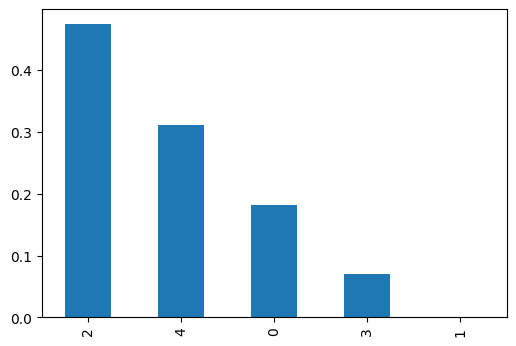

In [52]:
fs.fit(X,y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [53]:
X_selected = fs.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected)

In [54]:
X.head()

,0,1,2,3,4
0,-1.374776,0.403894,0.107937,0.892338,1.452529
1,0.392626,-0.103764,-1.626572,0.107467,-0.998062
2,0.084477,-0.840636,0.226355,-0.068577,-1.427489
3,1.286898,-0.990091,0.244657,-1.135363,0.880129
4,-1.011147,0.621170,-0.494025,-2.843515,0.043892


In [55]:
X_selected.head()

,0,1,2
0,-1.374776,0.107937,1.452529
1,0.392626,-1.626572,-0.998062
2,0.084477,0.226355,-1.427489
3,1.286898,0.244657,0.880129
4,-1.011147,-0.494025,0.043892
